In [1]:
import numpy as np
from utils import image_process, camera_calibration, controller
from matplotlib import pyplot as plt
import cv2
import os
import urx

In [2]:
w = 198
h = 148
img_processor = image_process.ImageProcessor(198, 148)
images = img_processor.load_images("src/")


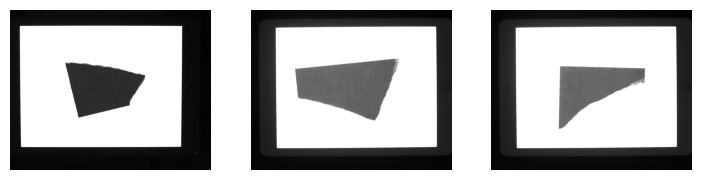

In [3]:
img_processor.display_images(images)

In [4]:
calibration_images = img_processor.load_images("calibration/")

In [5]:
mtx, dist, newcameramtx = camera_calibration.calibrator(27)

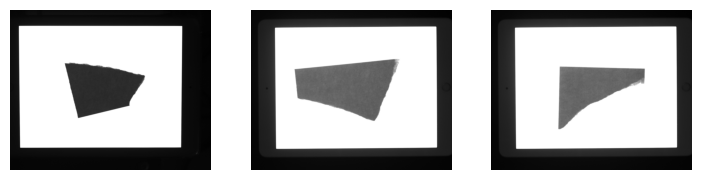

In [6]:
corrected_images = camera_calibration.correct_distortion(images, mtx, dist, newcameramtx)
img_processor.display_images(corrected_images)

In [7]:
scale = 4
images, contours, areas, appro_contours_list = img_processor.contour_for_robot(corrected_images, scale)

[[[  54  106]]

 [[  62  883]]

 [[1091  881]]

 [[1097  106]]]
[[[1183  112]]

 [[ 151  117]]

 [[ 158  889]]

 [[1184  883]]]
[[[1183  112]]

 [[ 152  116]]

 [[ 158  889]]

 [[1185  882]]]


(-0.5, 771.5, 571.5, -0.5)

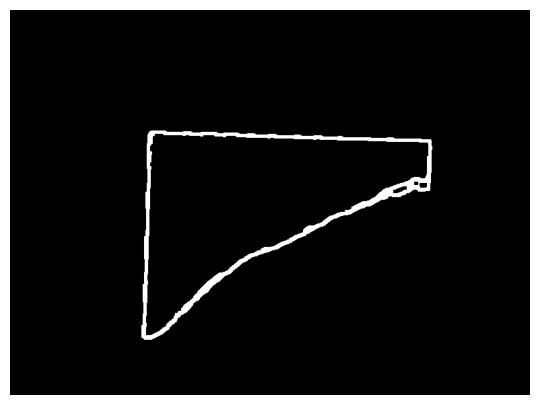

In [13]:
fig = plt.figure(figsize=(10,5))

plt.imshow(images[2], cmap="gray")
plt.axis('off')


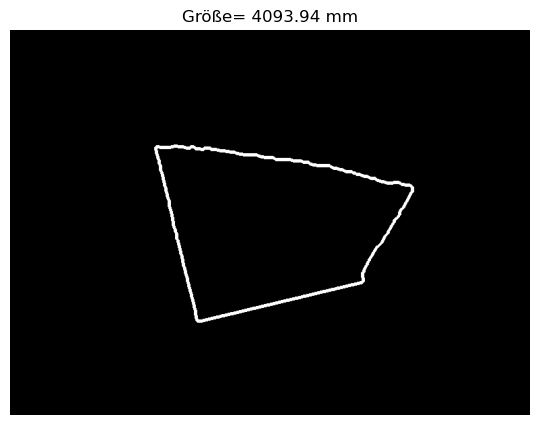

In [9]:
img_processor.display_contour(images[0], contours[0], areas[0])


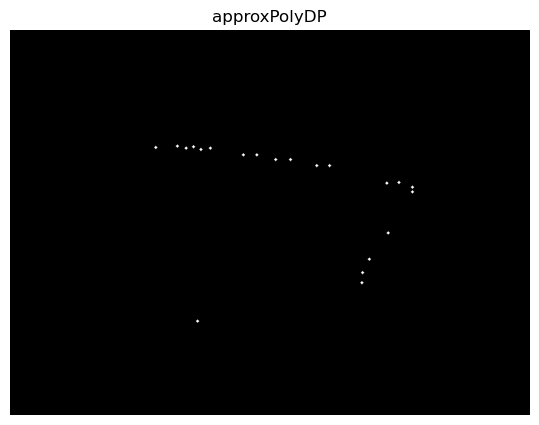

In [10]:
img_processor.display_approx_contour(images[0], appro_contours_list[0])

In [11]:
robot_controller = controller.RobotController(0,0,0.08)
robot_controller.initialize(2) # payload 2

TimeoutError: timed out

In [ ]:
robot_controller.start_pos() # Default position

NameError: name 'robot_controller' is not defined

In [ ]:
con = appro_contours_list[0] # size 3 dimension [[[]]]
print(con)
con = np.squeeze(con, axis=1) # size 2 dimension [[]]
type(con)
con = [(ele+10)/scale/1000 for ele in con] # mm to m, divid scale to origin image
path = robot_controller.transformation(con)
type(con)

list

In [ ]:
# rob = urx.Robot("192.168.0.100", use_rt=True)
# pose = rob.getl()
# rx, ry, rz = pose[3:]
# print(rx, ry, rz,w,h)
robot_controller.adjust(w, h)

In [ ]:
robot_controller.move_to(path)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
finished


Exception in thread Exception in thread Thread-14:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
Exception in thread Thread-6:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
Thread-17:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
Exception in thread Thread-10:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "g:\Anacon\lib\site-packages\urx\ursecmon.py", line 293, in run
    self.run()
  File "g:\Anacon\lib\site-packages\urx\ursecmon.py", line 293, in run
    data = self._get_data()
  File "g:\Anacon\lib\site-packages\urx\ursecmon.py", line 340, in _get_data
    self.run()
  File "g:\Anacon\lib\site-packages\urx\ursecmon.py", line 293, in run
    tmp = self._s_secondary.recv(1024)
socket.timeout: timed out
    self.run()
  File "g:\Anacon\lib\site

In [ ]:
import random
pose = rob.getl()
rx, ry, rz = pose[3:]
# 固定z坐标值
z_value = 0.3  # 替换为您想要的z坐标值

# 生成8个随机坐标点
random_coordinates = []

for _ in range(8):
    x_value = random.uniform(0.05, 0.45)  # 随机生成0到1之间的x坐标
    y_value = random.uniform(0.05, 0.45)  # 随机生成0到1之间的y坐标
    random_coordinates.append((x_value, y_value, z_value,rx, ry, rz))

# # 打印生成的坐标点
# for i, coord in enumerate(random_coordinates, start=1):
#     x, y, z, = coord
#     print(f"Point {i}: X={x:.2f}, Y={y:.2f}, Z={z_value:.2f}")
print(random_coordinates)

    


[(0.24183584514928458, 0.34481573262579013, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.34642604553098255, 0.3671951265859244, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.16797254919904703, 0.2529669207265148, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.3227936950806306, 0.0854457953428633, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.18812025733958676, 0.13554353261314817, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.285635100728727, 0.26994501529840975, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.2625893473589231, 0.11563563421529532, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182), (0.06885486004540349, 0.16060480712723227, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182)]


In [ ]:
rob = urx.Robot("192.168.0.100", use_rt=True)
rob.set_tcp((0, 0, 0.08, 0, 0, 0))
rob.set_payload(2, (0, 0, 0.1))
rob.set_gravity((0, 0, 9.81))
pi = np.pi

tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 68
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1092
tried 11 times to find a packet in data, advertised packet size: -2, type: 3
Data length: 1420


Exception in thread Thread-18:
Traceback (most recent call last):
  File "g:\Anacon\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 402, in run
    self.__recv_rt_data()
  File "g:\Anacon\lib\site-packages\urx\urrtmon.py", line 286, in __recv_rt_data
    if self.urFirm >= 3.1:
TypeError: '>=' not supported between instances of 'NoneType' and 'float'


In [ ]:
i=7
print(random_coordinates[i])
target_pose = random_coordinates[i] # [x, y, z, rx, ry, rz]

rob.movel(target_pose, 0.02,0.01)

(0.06885486004540349, 0.16060480712723227, 0.3, -3.047272344846414, -0.7636174848884181, -0.0005166329986651182)


<Transform:
<Orientation: 
array([[ 8.81822643e-01,  4.71581161e-01,  1.88240808e-04],
       [ 4.71581152e-01, -8.81822663e-01,  9.15005833e-05],
       [ 2.09144962e-04,  8.08353122e-06, -9.99999978e-01]])>
<Vector: (0.06884, 0.16060, 0.29995)>
>

In [ ]:
j =7
for i in range(10):
    rob.movel([random_coordinates[j][0]/10*(i+1), random_coordinates[j][1], 0.3, rx, ry, rz], 0.5, 0.05)

In [ ]:
p=rob.getl()
p

[0.0688573708430748,
 0.16059491185339797,
 0.30005379035550406,
 -3.0472890272011393,
 -0.7634702980546121,
 -0.000796888496484213]

In [ ]:
import math
import time


In [ ]:
def calculate_distances(points):
    distances = []
    for i in range(len(points) - 1):
        x1, y1 = points[i]
        x2, y2 = points[i + 1]
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distances.append(distance)
    return distances
path = [(coord[0],coord[1]) for coord in random_coordinates]
start_time = time.time()
d = calculate_distances(path)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Function took {elapsed_time:.6f} seconds to run.")

print(d)




Function took 0.000000 seconds to run.
[0.10695768925096798, 0.21188141345326114, 0.2281072437733876, 0.1436896590315159, 0.16605090553563753, 0.15602080578767583, 0.198885087643634]


In [ ]:
def calculate_distances_np(points):
    
    points = np.array(points)
    deltas = np.diff(points, axis=0)
    distances = np.linalg.norm(deltas, axis=1)
    return distances

start_time = time.time()
distances_np = calculate_distances_np(path)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Function took {elapsed_time:.6f} seconds to run.")
print(distances_np)


Function took 0.000977 seconds to run.
[0.00801561 0.00333542 0.00279508 0.00292617 0.00353553 0.0125025
 0.005      0.00721543 0.0055     0.01000625 0.00475    0.02222189
 0.00450694 0.00529741 0.00175    0.0177077  0.0120026  0.00559017
 0.00375832 0.06264234]


In [ ]:
# Speed of the robot v
# Acceleration of the robot a
# Load or torque of the robot τ
# Angular error of the actual measurement Δϕ

# data
v = np.array([0.005, 0.01, 0.015, 0.02, 0.04, 0.06, 0.1])
a = np.array([0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 1])
tau = np.array([2, 2, 2, 2, 2, 2, 2])
delta_phi = np.array([0.06, 0.12, 0.15, 0.09, 0.06, 0.1, 0.04])

# Use linear regression to fit the data
k1, k1_intercept = np.polyfit(v, x, 1)
k2, k2_intercept = np.polyfit(a, x, 1)
k3, k3_intercept = np.polyfit(tau, x, 1)
k5, k5_intercept = np.polyfit(d, x, 1)

# Use linear regression to fit the data
k1_y, k1_intercept_y = np.polyfit(v, y, 1)
k2_y, k2_intercept_y = np.polyfit(a, y, 1)
k3_y, k3_intercept_y = np.polyfit(tau, y, 1)
k5_y, k5_intercept_y = np.polyfit(d, y, 1)

# k4 as the mean or median of the error
k4_x = np.median(x)
k4_x = np.median(y)




NameError: name 'np' is not defined

In [ ]:
# compensation
v = 0.01
a = 0.1
tau = 2

compen_phi = k1*v + k2*a + k3*tau + k4 + k5*d


In [ ]:
path = robot_controller.transformation(con)

def move_to(self, path: list):
    pose = rob.getl()
    rx, ry, rz = pose[3:]
    
    # 位移误差补偿
    dx = 0.005
    dy = 0.005

    # 角度误差补偿
    drx = 0.01
    dry = 0.01

    for i in range(len(path)):
        # 应用位移补偿
        corrected_x = path[i][0] + dx
        corrected_y = path[i][1] + dy
        
        # 应用角度补偿
        corrected_rx = rx + drx
        corrected_ry = ry + dry

        rob.movel([corrected_x, corrected_y, 0.1, corrected_rx, corrected_ry, rz], 0.005, 0.005)
        print('%i. point' % (i+1))
    
    start_pos = self.start_pos()
    rob.movel([start_pos, rx, ry, rz], 0.05, 0.05)
    print('finished')

move_to(path)